In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

pd.set_option("display.max_columns",None)
df=sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Kategorik Verilerin Analizi

In [2]:
# Dataframe'in genel özelliklerine göz atma

def check_df(dataframe,head=5):
    print("######## Shape #########")  # Dataframe'in satır ve sütun bilgisini ekrana yazdırma 
    print(dataframe.shape)
    print("######## Type #########")   # Dataframe de bulunan sütunların tiplerini ekrana yazdırma
    print(dataframe.dtypes)
    print("######## Head #########")   # Dataframe'in ilk 5 satırını ekrana yazdırma
    print(dataframe.head(head))
    print("######## Tail #########")   # Dataframe'in son 5 satırını ekrana yazdırma
    print(dataframe.tail(head))
    print("######## NaN #########")    # Dataframe de bulunan eksik verileri tespit etme
    print(dataframe.isnull().sum())
    print("######## Quantiles #########")   # Dataframe den yüzdelik dilimler halinde bilgi alma
    print(dataframe.describe([0,0.25,0.50,0.75,0.90,1]).T)
    
check_df(df)
    

######## Shape #########
(891, 15)
######## Type #########
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object
######## Head #########
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  South

In [3]:
# Tip bilgisine göre kategorik olan sütunlara ulaşalım

cat_colm=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
print(cat_colm)

['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [4]:
# Numerik olup ama kategorik olan değişkenleri seçelim (örneğin: survived)
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype in ["int64", "float64"]]
print(f"num_but_cat olarak seçilen sütunlar: {num_but_cat}")

# Çok fazla değişkene sahip kategorik verileri çıkaralım (20 sınırı)
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtype in ["category", "object"]]
print(f"cat_but_car olarak seçilen sütunlar: {cat_but_car}")

# Kategorik değişkenleri birleştirme (num_but_cat ve cat_but_car dışındaki kategorik değişkenler)
cat_colm = [col for col in df.columns if str(df[col].dtype) in ["category", "object"]]
cat_colm = [col for col in cat_colm if col not in cat_but_car]

print(f"Kategorik sütunlar: {cat_colm}")

num_but_cat olarak seçilen sütunlar: ['survived', 'pclass', 'sibsp', 'parch']
cat_but_car olarak seçilen sütunlar: []
Kategorik sütunlar: ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']


        sex  %'lik Oran
sex                    
male    577   64.758698
female  314   35.241302
################################################


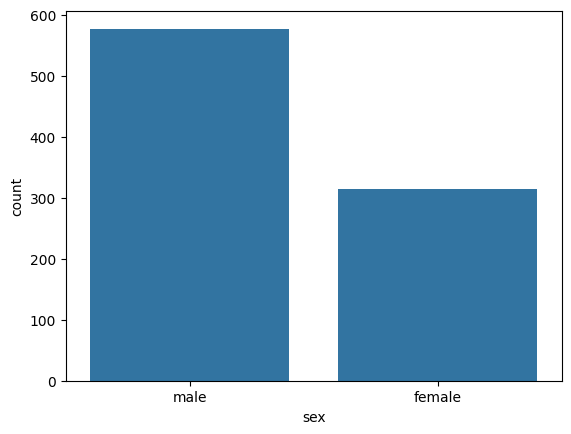

          embarked  %'lik Oran
embarked                      
S              644   72.278339
C              168   18.855219
Q               77    8.641975
################################################


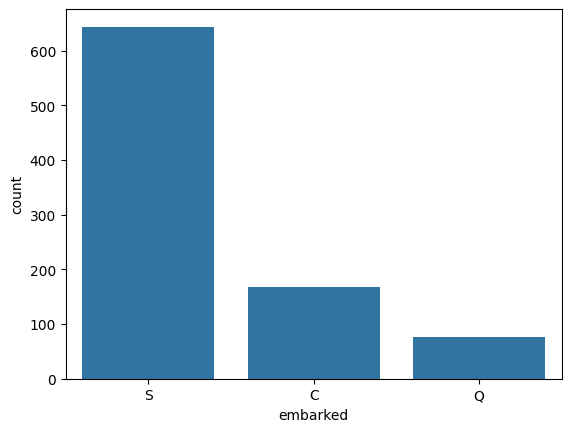

        class  %'lik Oran
class                    
Third     491   55.106622
First     216   24.242424
Second    184   20.650954
################################################


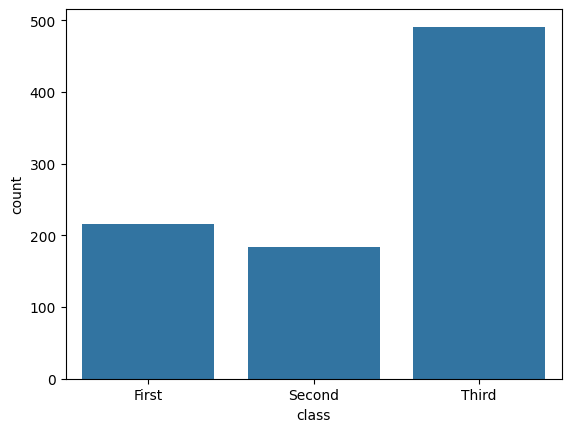

       who  %'lik Oran
who                   
man    537   60.269360
woman  271   30.415264
child   83    9.315376
################################################


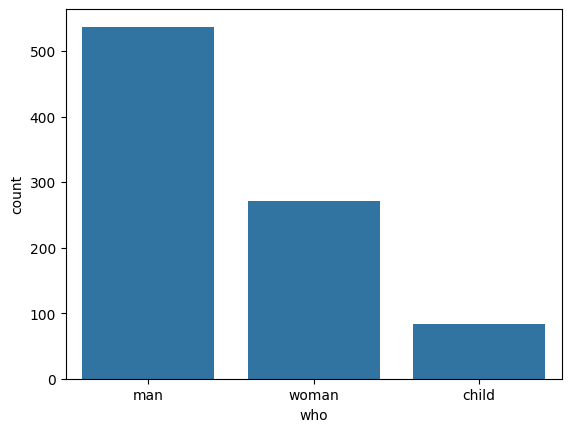

      deck  %'lik Oran
deck                  
C       59    6.621773
B       47    5.274972
D       33    3.703704
E       32    3.591470
A       15    1.683502
F       13    1.459035
G        4    0.448934
################################################


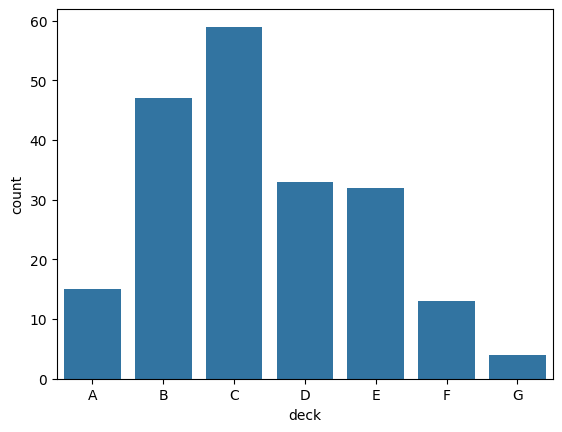

             embark_town  %'lik Oran
embark_town                         
Southampton          644   72.278339
Cherbourg            168   18.855219
Queenstown            77    8.641975
################################################


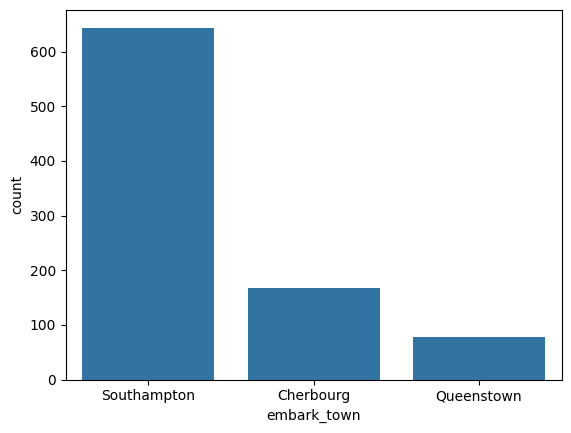

       alive  %'lik Oran
alive                   
no       549   61.616162
yes      342   38.383838
################################################


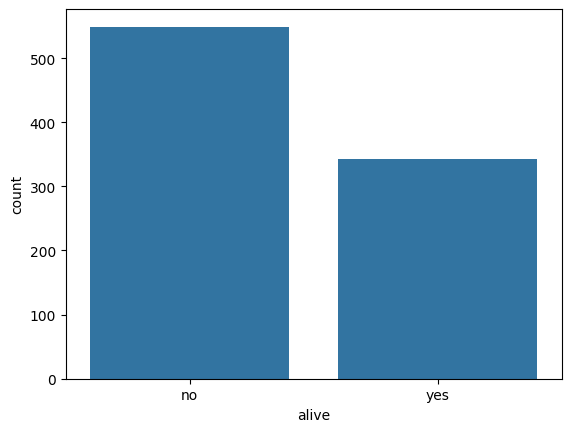

In [5]:
# Kategorik değişkenlerin özetini yazdıran fonksiyon
def cat_summary(dataframe, col_name, plot=False):
    summary = pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "%'lik Oran": 100 * dataframe[col_name].value_counts() / len(dataframe)})
    print(summary)
    print("################################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

# Boolean türde olan verileri dönüştürme ve görselleştirme
for col in cat_colm:
    if df[col].dtype == "bool":
        df[col] = df[col].astype(int)
    cat_summary(df, col, plot=True)

# Sayısal Verilerin Analizi

In [6]:
# Sayısal verilerin bulunduğu sütunları seçiyoruz

num_colm=[col for col in df.columns if df[col].dtypes in ["int","float"]]
print(num_colm)

# Kategorik olup numerik gibi görünen sütunları siliyoruz
num_colm = [col for col in num_colm if col not in num_but_cat]
print(num_colm)

['age', 'fare']
['age', 'fare']


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


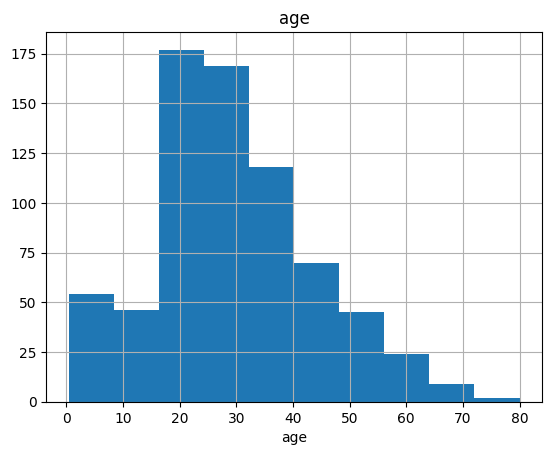

#####################################
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


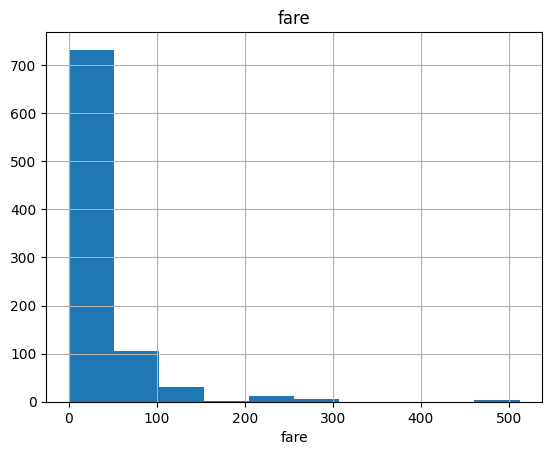

#####################################


In [7]:
# Sayısal verilerimizi grafiksel olarak analiz edelim
def num_summary(dataframe,numerical_col,plot=False):
    print(df[numerical_col].describe().T)
    
    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
    print("#####################################")
    
for col in num_colm:
    num_summary(df,col,plot=True)

# Hedef Değişken Analizi

In [8]:
# Kategorik değişkenlerle hedef değişken analizi

def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col,observed=True)[target].mean()}))
    
    
for col in cat_colm:
    target_summary_with_cat(df,"survived",col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0


In [9]:
# Sayısal değişkenlerle hedef değişken analizi

def target_summary_with_num(dataframe,target,numerical_col):
    print(dataframe.groupby(target,observed=True).agg({numerical_col:"mean"}),end="\n\n\n")
    
    
for col in num_colm:
    target_summary_with_num(df,"survived",col)

                age
survived           
0         30.626179
1         28.343690


               fare
survived           
0         22.117887
1         48.395408




# Korelasyon Analizi

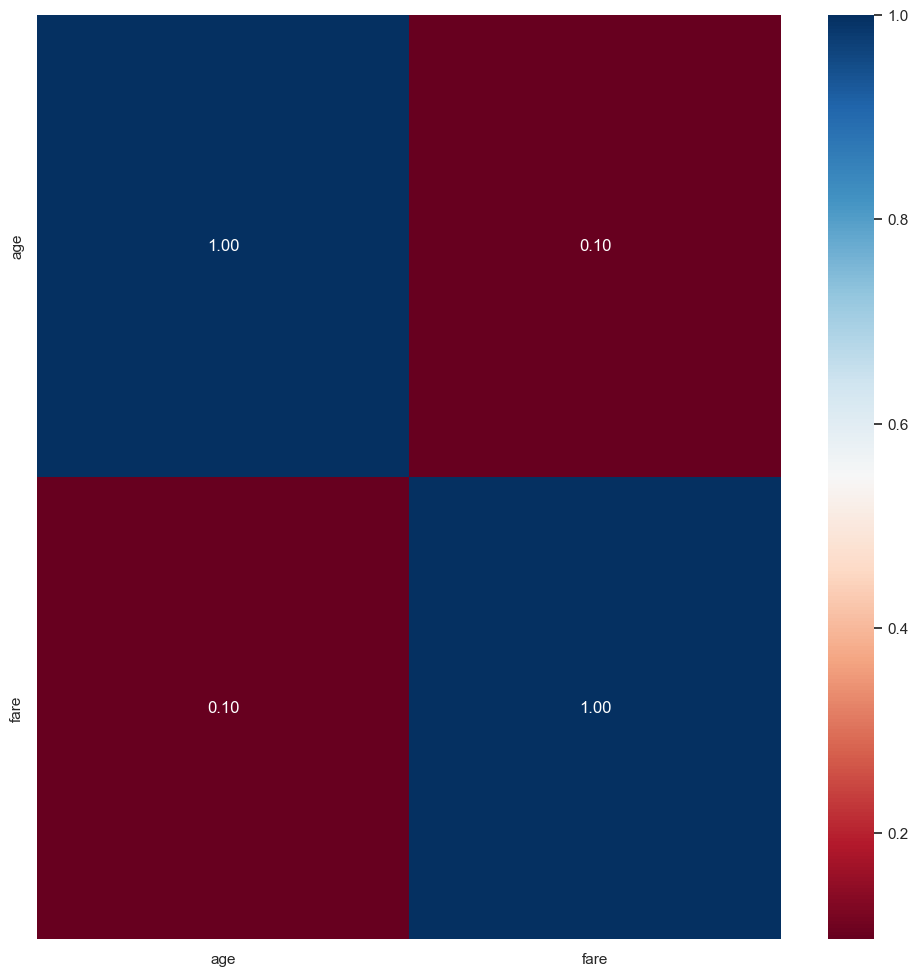

In [10]:
corr=df[num_colm].corr()

# Isı haritası

# Bu veri setinde sadece 2 adet sayısal veri geldiği için ısı haritası küçük fakat farklı veri setlerinde deneyebilirsiniz :)
sns.set(rc={"figure.figsize":[12,12]})

sns.heatmap(corr,cmap="RdBu",annot=True,fmt='.2f')
plt.show()